In [6]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve
import matplotlib.pyplot as plt

random_state = 101

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [2]:
#https://www.kaggle.com/code/yus002/logistic-regression-optuna-tuning
#Code used from the above author
#Helps to reduce size in memory of the data so that models can run faster

def rm(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [3]:
X_train = pd.read_csv(path_csv + "ontime_reporting_X_train.csv")
y_train = pd.read_csv(path_csv + "ontime_reporting_y_train.csv")
X_train = rm(X_train)
y_train = np.ravel(y_train)

Memory usage of dataframe is 1256.91 MB
Memory usage after optimization is: 242.04 MB
Decreased by 80.7%


In [4]:
dummy_class = DummyClassifier(random_state=random_state)
dummy_class.fit(X_train, y_train)

DummyClassifier(random_state=101)

In [5]:
X_test = pd.read_csv(path_csv + "ontime_reporting_X_test.csv")
y_test = pd.read_csv(path_csv + "ontime_reporting_y_test.csv")
X_test = rm(X_test)
y_test = np.ravel(y_test)

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 60.51 MB
Decreased by 80.7%


In [7]:
results = pd.DataFrame(columns=["Model", "AUROC", "Balanced Accuracy", "F1", "Recall", "Precision"])

def evaluation(y_test_input, y_pred_input, model_name, y_pred_proba_input):

    auroc = round(roc_auc_score(y_test_input, y_pred_proba_input),3)
    bal_acc = round(balanced_accuracy_score(y_test_input, y_pred_input),3)
    f1 = round(f1_score(y_test_input, y_pred_input),3)
    recall = round(recall_score(y_test_input, y_pred_input),3)
    precis = round(precision_score(y_test_input, y_pred_input),3)

    results.loc[len(results)+1] = [type(model_name).__name__, auroc, bal_acc, f1, recall, precis]

    print("AUROC Score: ", auroc)
    print("Balanced Accuracy Score: ", bal_acc)
    print("F1 Score: ", f1)
    print("Recall Score: ", recall)
    print("Precision Score: ", precis)
    cm = confusion_matrix(y_test_input, y_pred_input)

    fig, ax = plt.subplots(figsize=(4, 6))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [8]:
y_pred_dummy = dummy_class.predict(X_test)
y_pred_prob_dummy = dummy_class.predict_proba(X_test)[:, 1]

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUROC Score:  0.5
Balanced Accuracy Score:  0.5
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  0.0


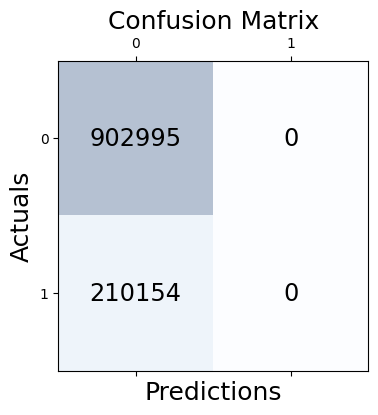

In [9]:
evaluation(y_test, y_pred_dummy, dummy_class, y_pred_prob_dummy)